In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from node2vec import Node2Vec 
import umap
import fonctions
from sklearn.model_selection import train_test_split
from scipy import stats

In [2]:
fichier_test = 'graphe_complet_final.csv'

G = fonctions.creer_graphe_twitter(fichier_test)

Chargement des liens depuis graphe_complet_final.csv...
------------------------------
Nombre de nœuds : 144222
Nombre d'arêtes (retweets) : 216101
------------------------------


In [3]:
edges_file = 'graphe_complet_final.csv'
nodes_file = 'NODES_climatoscope_graph_2022-07-01_2022-10-30_th=3.0_flc=0_world_2185-pro-anti_Louvaindic_testtop_tableusers.csv'
emb= pd.read_csv('embedings.csv')
df_edges = pd.read_csv(edges_file)
df_nodes = pd.read_csv(nodes_file)

labeled=list(df_nodes['Id'])
unlabeled=list(set(G.nodes)-set(labeled))

emb_col_name = emb.columns[0] 

emb_labeled = emb[emb[emb_col_name].isin(labeled)].reset_index(drop=True)

liste_emb_filtered = emb_labeled.values.tolist()

train, test = train_test_split(liste_emb_filtered, test_size=0.20, random_state=42)


In [4]:
# On crée des versions sans la colonne ID (qui est à l'indice 0)
train_ = [row[1:] for row in train]
test_ = [row[1:] for row in test]
#apprentissage non supervisé
reducer = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    random_state=42,
    target_weight=0.5  # Équilibre entre la structure des données et les labels
)

# Apprentissage sur la population de 80% avec non supervision
train_embedding = reducer.fit_transform(train_)
test_emb=reducer.transform(test_)

C:\Users\Elyes DJOUHRI\anaconda2\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [5]:
mapping_dict = {int(k): v for k, v in zip(df_nodes['Id'], df_nodes['modularity_class'])}


y_list = []
for node_id in train:
    val = int(node_id[0] if isinstance(node_id, (list, np.ndarray)) else node_id)
    y_list.append(mapping_dict.get(val, -1))

# 3. CRUCIAL : Convertir en tableau NumPy avec un type numérique précis (int64)
train_opinions_np = np.array(y_list, dtype=np.int64)

In [6]:
#apprentissage supervisé
reducersupp = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    random_state=42,
    target_weight=0.5  
)
train_embeddingsupp = reducersupp.fit_transform(train_,y=train_opinions_np)
test_embsupp=reducersupp.transform(test_)


C:\Users\Elyes DJOUHRI\anaconda2\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


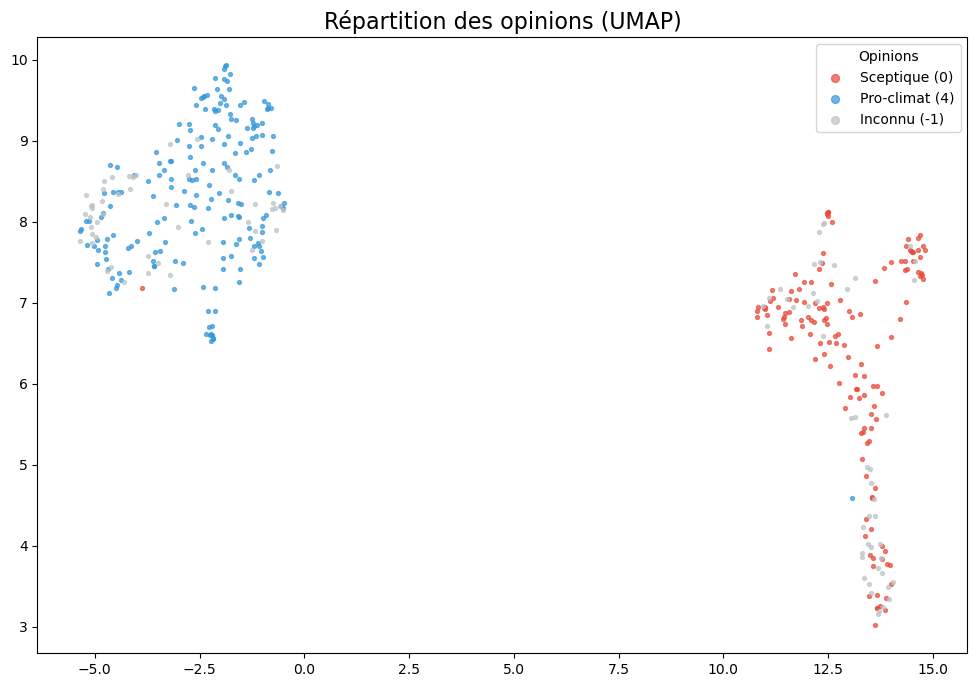

In [7]:
#non_suppervisé (le train)
fonctions.plot_umap_results(train_embedding,train_opinions_np)

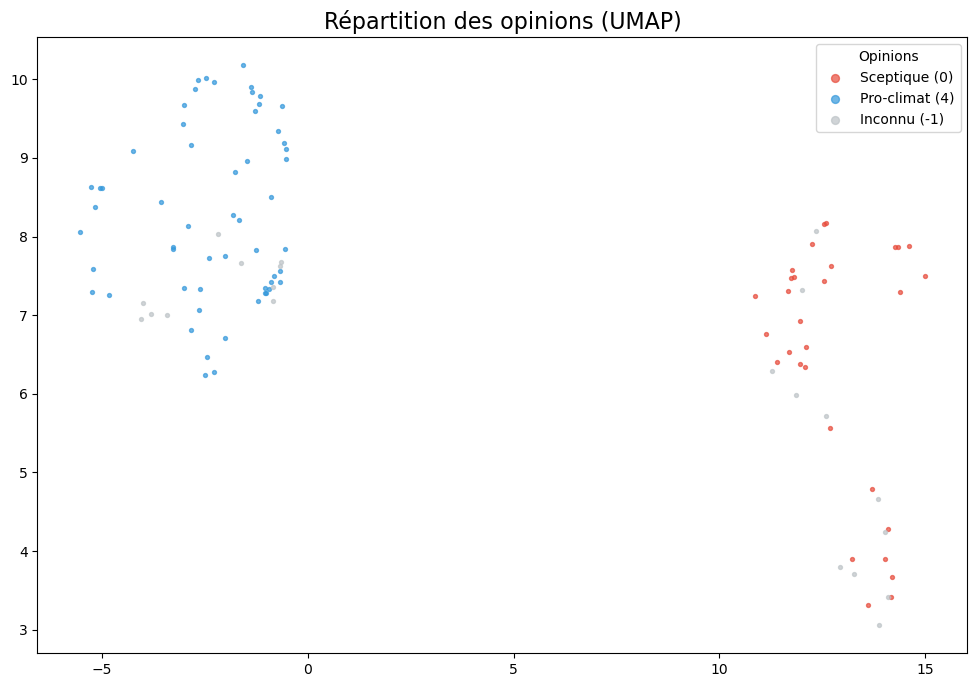

In [15]:

y_list_test = []
for node_id in test:
    val = int(node_id[0] if isinstance(node_id, (list, np.ndarray)) else node_id)
    y_list_test.append(mapping_dict.get(val, -1))

# 3. CRUCIAL : Convertir en tableau NumPy avec un type numérique précis (int64)
test_opinions_np = np.array(y_list_test, dtype=np.int64)

#non_suppervisé (le test)
fonctions.plot_umap_results(test_emb,test_opinions_np)

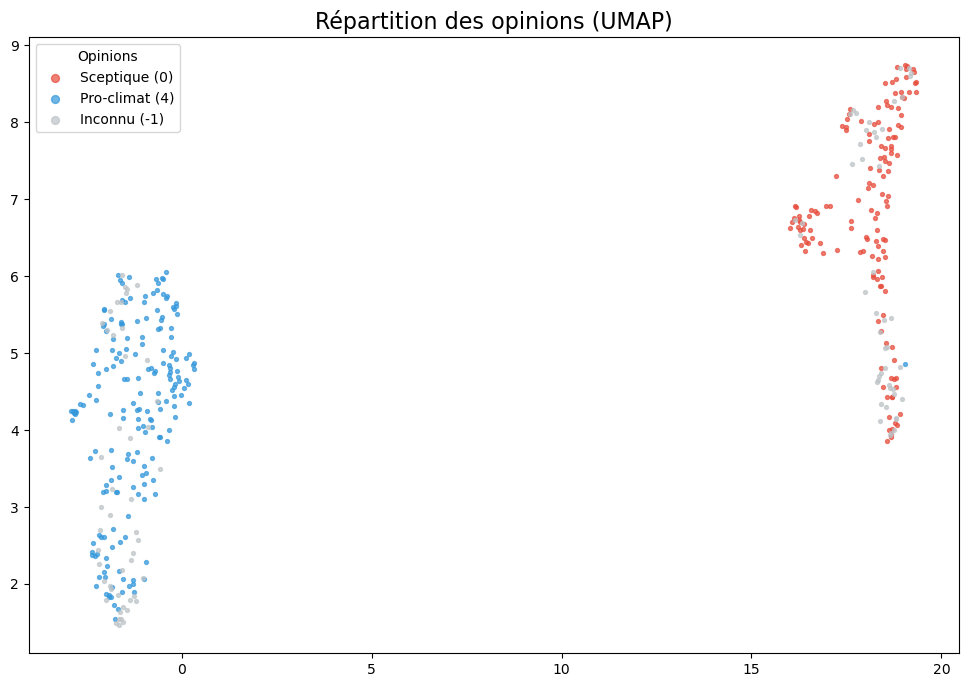

In [8]:
#suppervisé (le train)
fonctions.plot_umap_results(train_embeddingsupp,train_opinions_np)

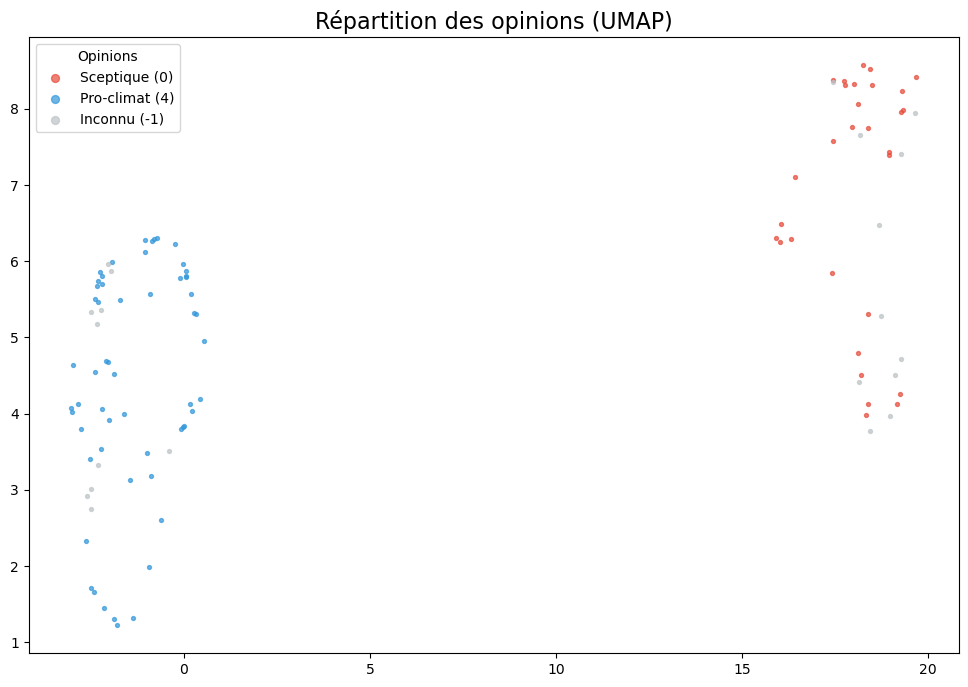

In [16]:
#suppervisé (le test)
fonctions.plot_umap_results(test_embsupp,test_opinions_np)

In [9]:
#on ne fait pas ici la suppression de tous les gens dont ont connait pas l'opinion

In [10]:

liste_emb = emb.values.tolist()

train_tot, test_tot = train_test_split(liste_emb, test_size=0.20, random_state=42)
len(train_tot)


115377

In [11]:
y_list_tot = []
for node_id in train_tot:
    val = int(node_id[0] if isinstance(node_id, (list, np.ndarray)) else node_id)
    y_list_tot.append(mapping_dict.get(val, -1))

# 3. CRUCIAL : Convertir en tableau NumPy avec un type numérique précis (int64)
train_opinions_np_tot = np.array(y_list_tot, dtype=np.int64)

In [12]:
#aprestissage supervisé sans suppressin sur 80%
train_tot_ = [row[1:] for row in train_tot]
test_tot_ = [row[1:] for row in test_tot]
reducers_tot = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    random_state=42,
    target_weight=0.5  
)
train_embedding_tot = reducers_tot.fit_transform(train_tot_,y=train_opinions_np_tot)
test_emb_tot=reducers_tot.transform(test_tot_)

C:\Users\Elyes DJOUHRI\anaconda2\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


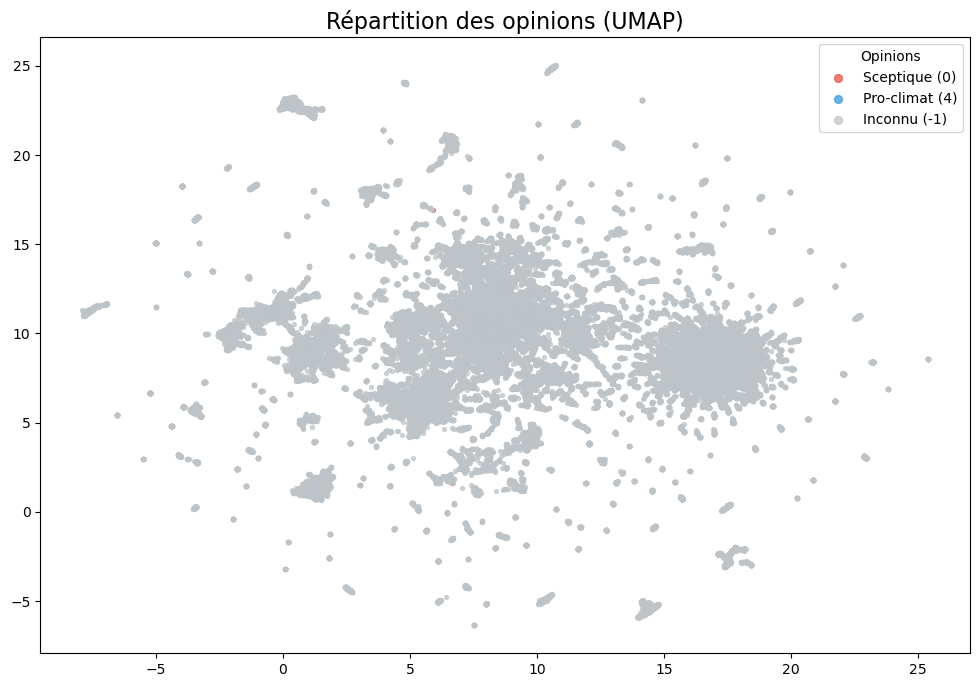

In [13]:
#supervisé (le train) avec 80% sans suppression des inconnues
fonctions.plot_umap_results(train_embedding_tot,train_opinions_np_tot)

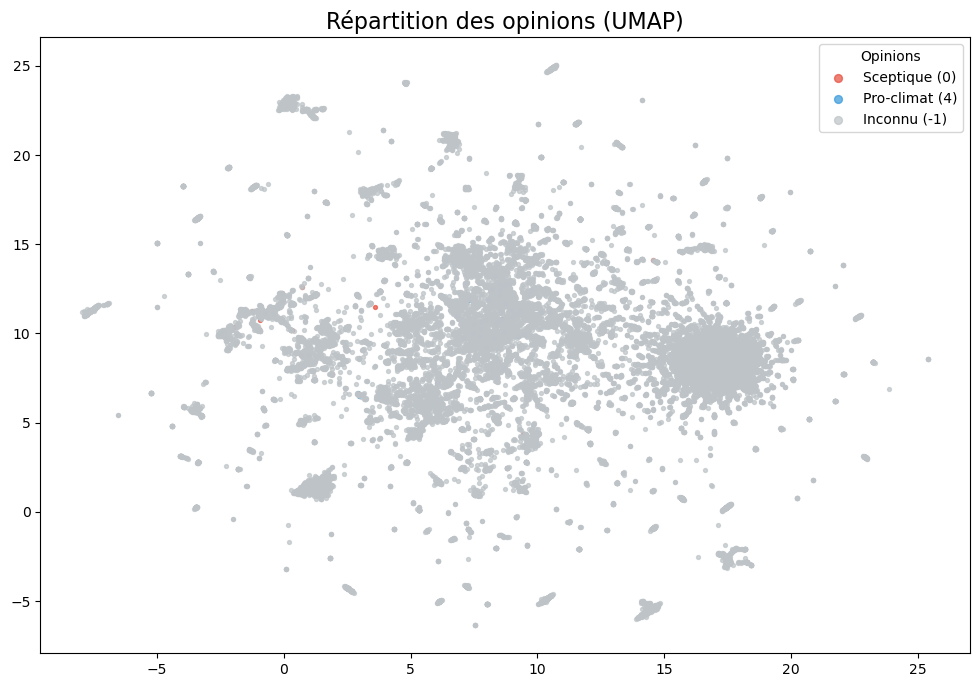

In [18]:
y_list_tot_test = []
for node_id in test_tot:
    val = int(node_id[0] if isinstance(node_id, (list, np.ndarray)) else node_id)
    y_list_tot_test.append(mapping_dict.get(val, -1))
                           
test_opinions_np_tot=np.array(y_list_tot_test, dtype=np.int64)
#supervisé (le test) avec 80% sans suppression des inconnues
fonctions.plot_umap_results(test_emb_tot,test_opinions_np_tot)